(2) Using steepest gradient descent, find the local minimum for the function in the problem 1 (i.e. J(w1, w2) = (w1 - 10 )^2 + (w2 - 10)^2). While applying gradient descent, do the following (a) Fixing the value for alpha (b) use line search to determine the value for alpha. Plot the intermediate steps in the iteration to show the minimal point in that direction. 

IMP NOTE: Plan your coding in such a way so that you can reuse them (use classes / functions). For example, code developed for problem 1 can be used to solve part of problem 2. Similarly, when you do the problems in ML, both multivariable and single variable optimization play greater role. You can use most of the code that you write today to do the problems in the coming weeks. 

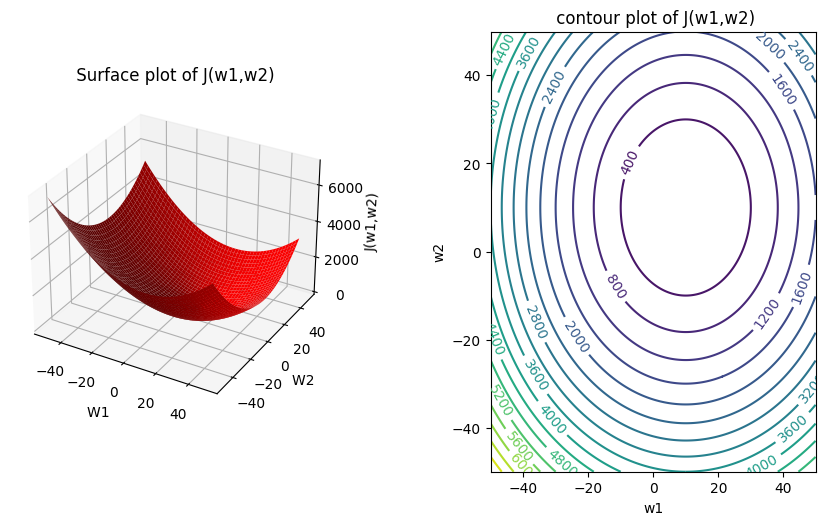

In [55]:
# PLotting the function
def J(w1,w2):
   return ((w1-10)**2+(w2-10)**2)

import numpy as np
import matplotlib.pyplot as plt
def plot():
 import numpy as np
 import matplotlib.pyplot as plt
 w1=np.arange(-50.0,50.0,0.1)
 w2=np.arange(-50.0,50.0,0.1)
 W1,W2=np.meshgrid(w1,w2)
 Z=(W1-10)**2+ (W2-10)**2
 fig=plt.figure(figsize=(10,7))
 ax=fig.add_subplot(121,projection='3d')
 ax.plot_surface(W1,W2,Z,color='red')
 ax.set_xlabel("W1 ")
 ax.set_ylabel("W2 ")
 ax.set_zlabel("J(w1,w2)")
 ax.set_title(" Surface plot of J(w1,w2)")

# generating contour plot
 w1=np.arange(-50.0,50.0,0.1)
 w2=np.arange(-50.0,50.0,0.1)
 W1,W2=np.meshgrid(w1,w2)
 Z=(W1-10)**2+ (W2-10)**2
 ax2=fig.add_subplot(122)
 cp=ax2.contour(w1,w2,Z,levels=20)
 ax2.set_xlabel("w1")
 ax2.set_ylabel("w2")
 ax2.set_title(" contour plot of J(w1,w2)")
 fig.tight_layout(pad=7)
 plt.clabel(cp,fontsize=10)
 plt.show()
plot()

a) Fixing the value of alpha

J(w1,w2)=  2.4324273756921713e-07
w1,w2= 9.999581770247481 9.999738606404675


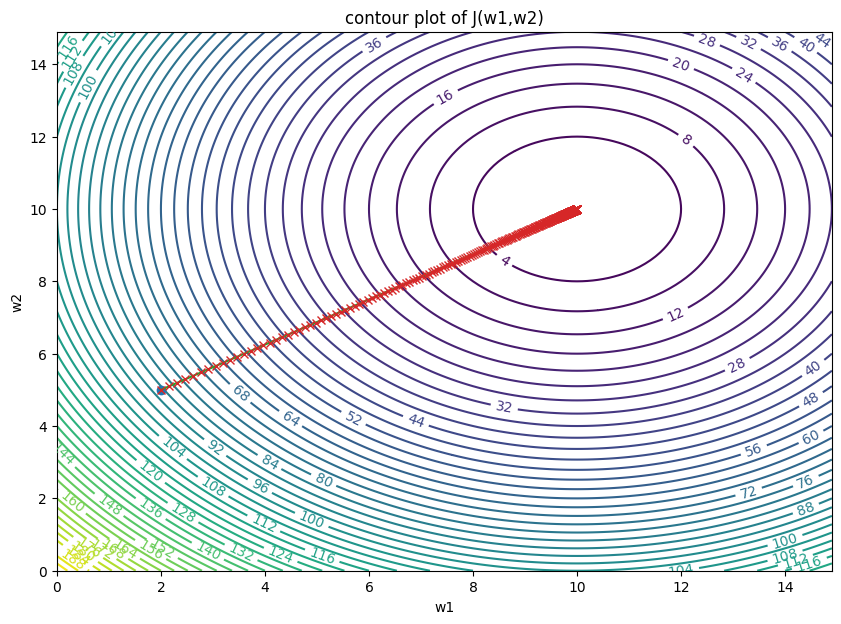

In [56]:
def J(w1,w2):
   return ((w1-10)**2+(w2-10)**2)
e=0.001
alpha=0.01
def gradient(w1,w2):
    return [2*(w1-10),2*(w2-10)]
start=[2,5]
w1=2
w2=5
xpoints=[2]
ypoints=[5]
while(np.linalg.norm(gradient(w1,w2))>e):
 w1=w1-alpha*gradient(w1,w2)[0]
 w2=w2-alpha*gradient(w1,w2)[1]
 xpoints.append(w1)
 ypoints.append(w2)

print("J(w1,w2)= ",J(w1,w2))
print("w1,w2=",w1,w2)
x1=np.arange(0.0,15.0,0.1)
x2=np.arange(0.0,15.0,0.1)
W1,W2=np.meshgrid(x1,x2)
fig=plt.figure(figsize=(10,7))
Z=(W1-10)**2+(W2-10)**2
ax2=fig.add_subplot(111)
cp=ax2.contour(x1,x2,Z,levels=60)
ax2.set_xlabel("w1")
ax2.set_ylabel("w2")
ax2.set_title("contour plot of J(w1,w2)")
plt.clabel(cp,fontsize=10)
plt.plot(2,5,'o')
plt.plot(w1,w2,'x')
plt.plot(xpoints,ypoints)
plt.plot(xpoints,ypoints,'x')
plt.show()


b) use line search to determine the value for alpha.

In [57]:
start=[2,5]
w1=2
w2=5
xpoints=[2]
ypoints=[5]
while(np.linalg.norm(gradient(w1,w2))>e):
 a=0.0001
 b=0.05
 n=50
 delta=(b-a)/n
 alpha1=a
 alpha2=alpha1+delta
 alpha3=alpha2+delta
 while alpha3<=b:
    direction=[-1*gradient(w1,w2)[0],-1*gradient(w1,w2)[1]]
    if (J(start[0]+alpha1*direction[0],start[1]+alpha1*direction[1])>=J(start[0]+alpha2*direction[0],start[1]+alpha2*direction[1])<=J(start[0]+alpha3*direction[0],start[1]+alpha3*direction[1])):
        break
    else:
        alpha1=alpha2
        alpha2=alpha3
        alpha3=alpha2+delta
  
 wm=(alpha1+alpha3)/2
 L=alpha3-alpha1
 y1=alpha1+L/4
 y2=alpha3-L/4
 e=0.01
 while abs(L)>e:
  if J(start[0]+w1*direction[0],start[1]+w1*direction[1])<J(start[0]+wm*direction[0],start[1]+wm*direction[1]):
      alpha3=wm
      wm=y1
      L=alpha3-alpha1
      y1=alpha1+L/4
      y2=alpha3-L/4
      
     
  else:
      if J(start[0]+w2*direction[0],start[1]+w2*direction[1])<J(start[0]+wm*direction[0],start[1]+wm*direction[1]):
       alpha1=wm
       wm=y2
       L=alpha3-alpha1
       y1=alpha1+L/4
       y2=alpha3-L/4
       
       
      else:
         alpha1=y1
         alpha3=y2
         L=alpha3-alpha1
         y1=alpha1+L/4
         y2=alpha3-L/4
         
        
 alpha_avg=(alpha1+alpha3)/2
 w1=w1-alpha_avg*gradient(w1,w2)[0]
 w2=w2-alpha_avg*gradient(w1,w2)[1]
 xpoints.append(w1)
 ypoints.append(w2)
print("J(w1,w2)= ",J(w1,w2))
print(w1,w2)

J(w1,w2)=  2.2925106712184494e-05
9.995939769711546 9.997462356069716


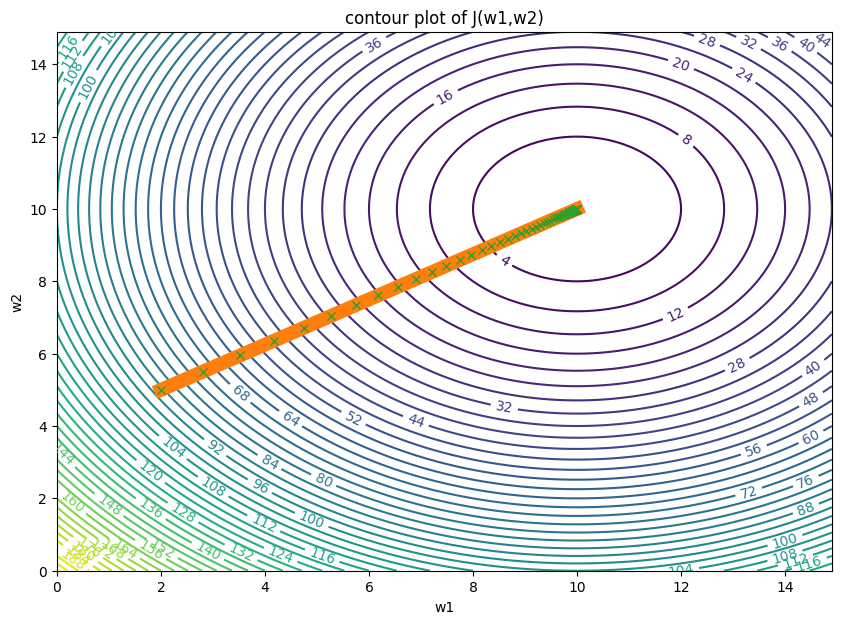

In [58]:
x1=np.arange(0.0,15.0,0.1)
x2=np.arange(0.0,15.0,0.1)
W1,W2=np.meshgrid(x1,x2)
fig=plt.figure(figsize=(10,7))
Z=(W1-10)**2+(W2-10)**2
ax2=fig.add_subplot(111)
cp=ax2.contour(x1,x2,Z,levels=60)
ax2.set_xlabel("w1")
ax2.set_ylabel("w2")
ax2.set_title("contour plot of J(w1,w2)")
plt.clabel(cp,fontsize=10)
plt.plot(2,5,'o')
plt.plot(xpoints,ypoints,linewidth='10')
plt.plot(xpoints,ypoints,'x')
plt.show()

Creating classes and doing the problem

In [78]:
def J(w1,w2):
   return ((w1-10)**2+(w2-10)**2)
class Multivariate_Optimization:
    def __init__(self,start,direction):
        self.start=np.array(start)
        self.direction=np.array(direction)
    def bracketing(self,start_a,end_a,n):
        self.start_a=start_a
        self.end_a=end_a
        self.n=n
        delta=(self.end_a-self.start_a)/self.n
        alpha1=self.start_a
        alpha2=alpha1+delta
        alpha3=alpha2+delta
        while alpha3<=b:
           if (J(self.start[0]+alpha1*self.direction[0],self.start[1]+alpha1*self.direction[1])>=J(self.start[0]+alpha2*self.direction[0],self.start[1]+alpha2*self.direction[1])<=J(self.start[0]+alpha3*self.direction[0],self.start[1]+alpha3*self.direction[1])):
            break
        else:
         alpha1=alpha2
         alpha2=alpha3
         alpha3=alpha2+delta
        return [alpha1,alpha3]
    def region_elimination(self,e,alpha1,alpha3):
       wm=(alpha1+alpha3)/2
       L=alpha3-alpha1
       w1=alpha1+L/4
       w2=alpha3-L/4
       self.e=e
       while abs(L)>self.e:
         if J(self.start[0]+w1*self.direction[0],self.start[1]+w1*self.direction[1])<J(self.start[0]+wm*self.direction[0],self.start[1]+wm*self.direction[1]):
          alpha3=wm
          wm=w1
          L=alpha3-alpha1
          w1=alpha1+L/4
          w2=alpha3-L/4
      
     
       else:
        if J(self.start[0]+w2*self.direction[0],self.start[1]+w2*self.direction[1])<J(self.start[0]+wm*self.direction[0],start[1]+wm*self.direction[1]):
         alpha1=wm
         wm=w2
         L=alpha3-alpha1
         w1=alpha1+L/4
         w2=alpha3-L/4
       
       
        else:
         alpha1=w1
         alpha3=w2
         L=alpha3-alpha1
         w1=alpha1+L/4
         w2=alpha3-L/4
       return [w1,w2]
    

J1=Multivariate_Optimization((2,5),(3,7))
J1.bracketing(0.01,2,50)
     
       

[0.049800000000000004, 0.12940000000000002]